## Análise Exploratória da Base de Dados Covid 19 em Curitiba

Análise realizada pelos alunos da disciplina Ciência de Dados e suas aplicações em cenário de pandemia.

Objetivo: <b>Analisar número de casos e óbitos de Covid 19 na cidade de Curitiba.</b>

### Etapa 1 - Leitura do arquivo csv

In [18]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt

df = pd.read_csv(r'https://mid.curitiba.pr.gov.br/dadosabertos/CasosCovid19/2020-11-01_Casos_Covid_19_-_Base_de_Dados.csv', sep=';', encoding='cp1252', header=0, index_col=0)
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,ENCERRAMENTO,DATA DO ÓBITO
POSIÇÃO,,,,,,
1.0,11/03/2020,CONFIRMADO,54,M,RECUPERADO,NaN
2.0,12/03/2020,CONFIRMADO,43,M,RECUPERADO,NaN
3.0,12/03/2020,CONFIRMADO,15,M,RECUPERADO,NaN
4.0,12/03/2020,CONFIRMADO,25,F,RECUPERADO,NaN
5.0,12/03/2020,CONFIRMADO,58,M,RECUPERADO,NaN


Para facilitar a análise, podemos renomear as colunas.

In [19]:
renomear_colunas = ['DATA_NOTIFICACAO','CLASSIFICAÇÃO','IDADE','SEXO','STATUS','DATA_OBITO']
df.columns = renomear_colunas
df

,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO
POSIÇÃO,,,,,,
1.000,11/03/2020,CONFIRMADO,54,M,RECUPERADO,NaN
2.000,12/03/2020,CONFIRMADO,43,M,RECUPERADO,NaN
3.000,12/03/2020,CONFIRMADO,15,M,RECUPERADO,NaN
4.000,12/03/2020,CONFIRMADO,25,F,RECUPERADO,NaN
5.000,12/03/2020,CONFIRMADO,58,M,RECUPERADO,NaN
...,...,...,...,...,...,...
52.492,30/10/2020,CONFIRMADO,56,M,RECUPERADO,NaN
52.493,30/10/2020,CONFIRMADO,23,M,NaN,NaN
52.494,30/10/2020,CONFIRMADO,3,M,NaN,NaN


Vamos também alterar os tipos das colunas adequadamente.

In [20]:
# converte colunas para formato data
df[['DATA_NOTIFICACAO','DATA_OBITO']] = df[['DATA_NOTIFICACAO','DATA_OBITO']].apply(pd.to_datetime, dayfirst=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 52496 entries, 1.0 to 52.496
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA_NOTIFICACAO  52496 non-null  datetime64[ns]
 1   CLASSIFICAÇÃO     52496 non-null  object        
 2   IDADE             52496 non-null  int64         
 3   SEXO              52496 non-null  object        
 4   STATUS            48846 non-null  object        
 5   DATA_OBITO        1475 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 2.8+ MB


### Etapa 2 - Verificação colunas e valores

Podemos verificar inicialmente quais os valores distintos em algumas colunas, para verificar a classificação. A seguir, verificamos como os dados são classificados na coluna Status.

In [21]:
df['STATUS'].unique()

array(['RECUPERADO', 'ÓBITO CONF', nan], dtype=object)

Verificamos que o Status é classificado em <b>Recuperado</b> e <b>Óbito Confirmado</b>. Também temos alguns valores nulos, onde possivelmente os casos ainda estão sendo avaliados. Primeiramente, vamos analisar os óbitos confirmados no município.

In [22]:
df_obitos= df[df['STATUS']=='ÓBITO CONF']
df_obitos

,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO
POSIÇÃO,,,,,,
110.000,2020-03-28,CONFIRMADO,61,M,ÓBITO CONF,2020-04-18
118.000,2020-03-29,CONFIRMADO,56,F,ÓBITO CONF,2020-04-06
137.000,2020-03-31,CONFIRMADO,93,M,ÓBITO CONF,2020-04-21
149.000,2020-03-31,CONFIRMADO,39,F,ÓBITO CONF,2020-04-25
155.000,2020-04-01,CONFIRMADO,85,M,ÓBITO CONF,2020-04-20
...,...,...,...,...,...,...
48.507,2020-10-16,CONFIRMADO,64,M,ÓBITO CONF,2020-10-29
49.513,2020-10-21,CONFIRMADO,80,M,ÓBITO CONF,2020-10-28
49.514,2020-10-21,CONFIRMADO,58,F,ÓBITO CONF,2020-10-29


Agora podemos verificar a quantidade de óbitos por mês. Para isso, extraimos da coluna data_obito apenas os valores referentes ao ano e mês, e contabilizamos quantas ocorrências aconteceram para cada mês.

In [23]:
df_obitos['DATA_OBITO_MES_ANO'] = df_obitos['DATA_OBITO'].dt.to_period('M')
df_obitos

<ipython-input-23-3aa56e8086e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obitos['DATA_OBITO_MES_ANO'] = df_obitos['DATA_OBITO'].dt.to_period('M')


,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO,DATA_OBITO_MES_ANO
POSIÇÃO,,,,,,,
110.000,2020-03-28,CONFIRMADO,61,M,ÓBITO CONF,2020-04-18,2020-04
118.000,2020-03-29,CONFIRMADO,56,F,ÓBITO CONF,2020-04-06,2020-04
137.000,2020-03-31,CONFIRMADO,93,M,ÓBITO CONF,2020-04-21,2020-04
149.000,2020-03-31,CONFIRMADO,39,F,ÓBITO CONF,2020-04-25,2020-04
155.000,2020-04-01,CONFIRMADO,85,M,ÓBITO CONF,2020-04-20,2020-04
...,...,...,...,...,...,...,...
48.507,2020-10-16,CONFIRMADO,64,M,ÓBITO CONF,2020-10-29,2020-10
49.513,2020-10-21,CONFIRMADO,80,M,ÓBITO CONF,2020-10-28,2020-10
49.514,2020-10-21,CONFIRMADO,58,F,ÓBITO CONF,2020-10-29,2020-10


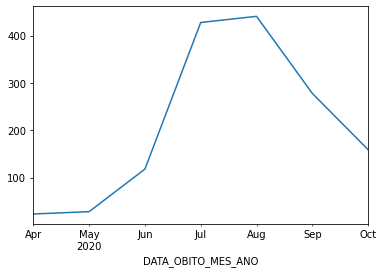

In [24]:
df_obitos_series= df_obitos.groupby(['DATA_OBITO_MES_ANO']).size().rename('Numero de Obitos')
df_obitos_series.plot()

Plotando o gráfico do número de mortes ao longo do tempo, verificamos a quantidade de obitos nos meses de abril ate a data atual.

In [25]:
print("Data do primeiro óbito:" ,df_obitos['DATA_OBITO'].min())
print("Data máxima de óbitos:",df_obitos['DATA_OBITO'].max())

Data do primeiro óbito: 2020-04-06 00:00:00
Data máxima de óbitos: 2020-10-30 00:00:00


Podemos também buscar erros e inconsistências nos dados referentes à idade do paciente. Para visualizar a amostra, podemos utilizar o box plot na coluna "IDADE".

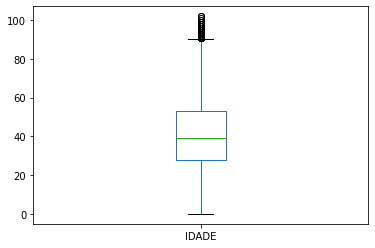

In [26]:
df['IDADE'].plot.box()

Para verificar outras estatísticas interessantes sobre essa coluna, podemos utilizar o método describe.

In [27]:
df['IDADE'].describe()

count    52496.000000
mean        40.836749
std         17.766300
min          0.000000
25%         28.000000
50%         39.000000
75%         53.000000
max        102.000000
Name: IDADE, dtype: float64

Aparentemente, essa coluna possui valores dentro do esperado, com a idade dos pacientes entre 0 e 102 anos e a média de idade de 41 anos.

Abaixo um exemplo de filtro aplicado para determinada data.

In [28]:
#exemplo de filtro entre datas
df_obitos_filtrado = df_obitos[(df_obitos['DATA_OBITO']>='2020-04-01') & (df_obitos['DATA_OBITO']<='2020-05-01')]
df_obitos_filtrado

,DATA_NOTIFICACAO,CLASSIFICAÇÃO,IDADE,SEXO,STATUS,DATA_OBITO,DATA_OBITO_MES_ANO
POSIÇÃO,,,,,,,
110.0,2020-03-28,CONFIRMADO,61,M,ÓBITO CONF,2020-04-18,2020-04
118.0,2020-03-29,CONFIRMADO,56,F,ÓBITO CONF,2020-04-06,2020-04
137.0,2020-03-31,CONFIRMADO,93,M,ÓBITO CONF,2020-04-21,2020-04
149.0,2020-03-31,CONFIRMADO,39,F,ÓBITO CONF,2020-04-25,2020-04
155.0,2020-04-01,CONFIRMADO,85,M,ÓBITO CONF,2020-04-20,2020-04
172.0,2020-04-01,CONFIRMADO,94,M,ÓBITO CONF,2020-04-06,2020-04
183.0,2020-04-02,CONFIRMADO,56,M,ÓBITO CONF,2020-04-07,2020-04
186.0,2020-04-02,CONFIRMADO,81,M,ÓBITO CONF,2020-04-27,2020-04
204.0,2020-04-03,CONFIRMADO,82,M,ÓBITO CONF,2020-04-14,2020-04


buscando possiveis outliers nas idades dos obitos

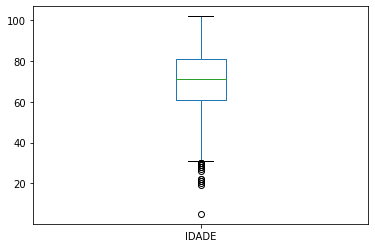

In [29]:
df_obitos['IDADE'].plot.box()

### RELAÇÃO DE QUANTIDADE DE OBITOS POR IDADE


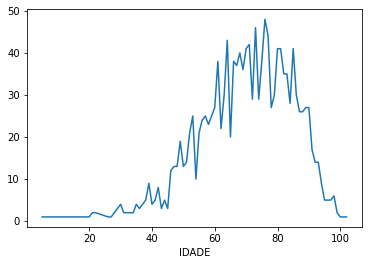

In [30]:
df_morte=df_obitos.groupby(['IDADE']).size()
df_morte.plot()

verificando a relação de obitos por idade, percebe-se que a partir de 50 até 80 anos tem um concentração maior de mortos.

### RELAÇÃO DE QUANTIDADE DE OBITOS POR IDADE, SEXO MASCULINO E FEMININO

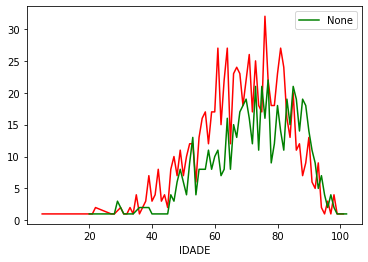

In [31]:
#separando os obitos dos homens
df_m=df_obitos[df_obitos['SEXO']=='M']
df_m=df_m.groupby(['IDADE']).size()

#separando os obitos das mulheres
df_f=df_obitos[df_obitos['SEXO']=='F']
df_f=df_f.groupby(['IDADE']).size()

df_m.plot(color='r')
df_f.plot(color='g',legend=True)

os dados sugerem que homens tendem a morrer mais que as mulheres

### RELAÇÃO TOTA DE CONTAMINADOS POR IDADE

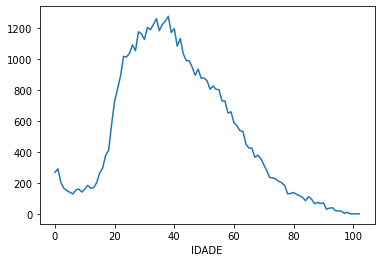

In [32]:
#relação total de contaminados por idade
df_com = df.groupby(['IDADE']).size()
df_com.plot()

o grafico sugere que a partir de 20 anos ate 60 anos tem uma alta concentração de pessoas infectadas
jovens antes dos 20 anos tendem a ser assintomaticos assintomáticos.


### RELAÇÃO DE QUANTIDADE TOTAL DE CONTAMINADOS POR IDADE, SEXO MASCULINO E FEMININO

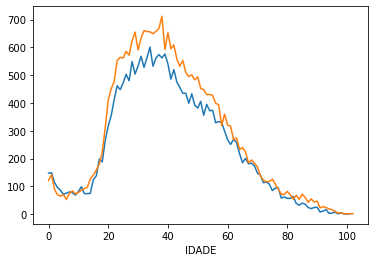

In [33]:
# RELAÇÃO DE QUANTIDADE DE CONTAMINADOS POR IDADE MASCULINO E FEMININO
#separando os contamindos homens
df_mtot=df[df['SEXO']=='M']
df_mtot=df_mtot.groupby(['IDADE']).size()

#separando os contaminados mulheres
df_ftot=df[df['SEXO']=='F']
df_ftot=df_ftot.groupby(['IDADE']).size()

df_mtot.plot()
df_ftot.plot()

o grafico sugere quem as mulheres tem uma leve tendencia de se infectarem mais

###relação de contaminados por idade e obitos por idade.

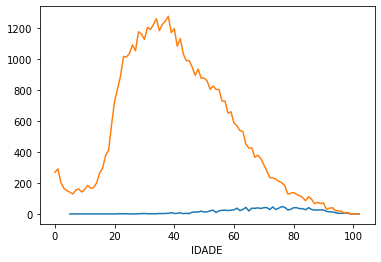

In [34]:
df_morte.plot()
df_com.plot()